#Digit Recognition

This notebook is used for explaining the steps involved in using CNN on MNIST dataset to do Digit Recognition

1. Import the required libraries
2. Download the MNIST Dataset
3. Observe the Dataset
4. Data Preprocessing 
5. Building the model
6. Training the model
7. Evaluating model accuracy
8. Making prediction on a test digit

## Note: Set Runtime to GPU before running the notebook

## Import the required libraries

In [ ]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Download the MNIST Dataset

In [44]:
(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

## Observe the Dataset

In [72]:
XTrain

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [73]:
YTrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
sample_image = XTest[4]

## Data Preprocessing

In [45]:
XTrain = XTrain.astype('float32')
XTest = XTest.astype('float32')

In [47]:
XTrain = XTrain/255.0
XTest =  XTest/255.0

In [30]:
XTrain = XTrain.reshape(XTrain.shape[0],28,28,1)
XTest = XTest.reshape(XTest.shape[0],28,28,1)

In [ ]:
YTrain = tf.keras.utils.to_categorical(YTrain,10)
YTest = tf.keras.utils.to_categorical(YTest,10)

## Building the model

In [58]:
model_CNN = tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",input_shape=[28,28,1]))
model_CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model_CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation="relu"))

model_CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model_CNN.add(tf.keras.layers.Dropout(0.4))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(units=256, activation="relu"))
model_CNN.add(tf.keras.layers.Dropout(0.3))
model_CNN.add(tf.keras.layers.Dense(units=10, activation="softmax"))
model_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 23, 23, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 3872)              0         
                                                      

In [59]:
model_CNN.compile(loss="categorical_crossentropy",optimizer="Adadelta",metrics=["categorical_accuracy"])

## Training the Model

In [62]:
model_CNN.fit(XTrain,YTrain,batch_size=256,epochs=10)

Epoch 1/10
235/235 [==============================] - 8s 31ms/step - loss: 28.0670 - categorical_accuracy: 0.1436
Epoch 2/10
235/235 [==============================] - 7s 31ms/step - loss: 19.4600 - categorical_accuracy: 0.1990
Epoch 3/10
235/235 [==============================] - 7s 31ms/step - loss: 14.6809 - categorical_accuracy: 0.2600
Epoch 4/10
235/235 [==============================] - 7s 31ms/step - loss: 11.3869 - categorical_accuracy: 0.3156
Epoch 5/10
235/235 [==============================] - 7s 31ms/step - loss: 9.0882 - categorical_accuracy: 0.3685
Epoch 6/10
235/235 [==============================] - 7s 32ms/step - loss: 7.3575 - categorical_accuracy: 0.4151
Epoch 7/10
235/235 [==============================] - 7s 31ms/step - loss: 6.0077 - categorical_accuracy: 0.4539
Epoch 8/10
235/235 [==============================] - 7s 31ms/step - loss: 5.0778 - categorical_accuracy: 0.4805
Epoch 9/10
235/235 [==============================] - 7s 31ms/step - loss: 4.3157 - categori

## Evaluating model accuracy

In [63]:
model_loss,model_accuracy = model_CNN.evaluate(XTest, YTest)

313/313 [==============================] - 2s 5ms/step - loss: 0.8226 - categorical_accuracy: 0.8032


## Making prediction on a test digit

#### Displaying the sample digit to be used in prediction

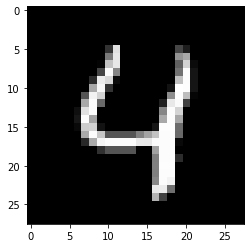

In [64]:
plt.imshow(sample_image,  cmap="gray")

In [65]:
reshaped_image = sample_image.reshape(1,28,28,1)

In [66]:
predicted_array = model_CNN.predict(reshaped_image)

In [67]:
predicted_array=list(predicted_array)

In [68]:
predicted_array = predicted_array[0]

In [69]:
predicted_array

array([1.7815741e-05, 1.3896727e-10, 8.7428759e-07, 1.2473388e-06,
       9.9974293e-01, 1.6768755e-07, 2.0666735e-09, 1.4763747e-04,
       1.9511763e-08, 8.9368696e-05], dtype=float32)

In [75]:
digit_prob = 0.0
digit = 0
for i in range(10):
  if predicted_array[i]>digit_prob:
    digit = i
    digit_prob = predicted_array[i]

#### Printing the digit predicted by model

In [76]:
digit

4